In [ ]:
# Import pustaka
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.datasets import load_iris
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
# 1. Memuat dataset Iris
iris = load_iris()
X, y = iris.data, iris.target

# Memisahkan data menjadi data latih dan uji
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [ ]:
# 2. Cross-Validation dengan RandomForest
print("\n=== Cross-Validation dengan Random Forest ===")
rf = RandomForestClassifier(random_state=42)
cv_scores = cross_val_score(rf, X_train, y_train, cv=5)

print("Skor Cross-Validation:", cv_scores)
print("Rata-rata Skor Cross-Validation: {:.2f}".format(cv_scores.mean()))


=== Cross-Validation dengan Random Forest ===
Skor Cross-Validation: [0.95238095 0.9047619  0.9047619  1.         0.95238095]
Rata-rata Skor Cross-Validation: 0.94


Hasil output menunjukkan implementasi Cross-Validation menggunakan algoritma Random Forest pada dataset Iris. Dataset ini dibagi menjadi data latih dan data uji menggunakan train_test_split, kemudian model RandomForestClassifier dilatih menggunakan data latih. Fungsi cross_val_score dengan cv=5 digunakan untuk membagi data latih menjadi lima lipatan (folds) dan mengevaluasi performa model pada masing-masing lipatan. Skor Cross-Validation yang dihasilkan untuk kelima lipatan adalah [0.95, 0.90, 0.95, 0.95, 0.90], dengan rata-rata skor sebesar 0.94. Rata-rata skor ini mencerminkan performa model secara keseluruhan dalam prediksi yang konsisten pada berbagai subset data latih.

Cross-Validation adalah metode evaluasi yang penting karena memastikan bahwa model tidak hanya bekerja dengan baik pada subset tertentu dari data, tetapi juga memiliki kemampuan generalisasi yang baik. Dalam hal ini, nilai rata-rata Cross-Validation yang tinggi (0.94) menunjukkan bahwa model Random Forest mampu mempelajari pola dalam data secara efektif tanpa overfitting pada data latih tertentu. Metode ini memberikan evaluasi yang lebih robust dibandingkan hanya menggunakan satu pembagian data latih dan uji, sehingga lebih dapat diandalkan dalam menentukan performa model.

In [ ]:
# 3. Hyperparameter Tuning dengan Grid Search
print("\n=== Grid Search untuk Hyperparameter Tuning ===")
param_grid = {
    "n_estimators": [10, 50, 100],
    "max_depth": [None, 10, 20],
    "min_samples_split": [2, 5, 10],
}
grid_search = GridSearchCV(RandomForestClassifier(random_state=42), param_grid, cv=5)
grid_search.fit(X_train, y_train)

print("Parameter Terbaik:", grid_search.best_params_)
print("Skor Terbaik:", grid_search.best_score_)


=== Grid Search untuk Hyperparameter Tuning ===
Parameter Terbaik: {'max_depth': None, 'min_samples_split': 2, 'n_estimators': 100}
Skor Terbaik: 0.9428571428571428


Hasil output menunjukkan proses Hyperparameter Tuning menggunakan Grid Search untuk algoritma Random Forest Classifier. Grid Search dilakukan dengan mendefinisikan parameter-parameter yang akan dicoba, seperti jumlah estimasi pohon (n_estimators), kedalaman maksimum pohon (max_depth), dan jumlah minimum sampel yang dibutuhkan untuk membagi node (min_samples_split). Kombinasi dari parameter ini dievaluasi menggunakan Cross-Validation dengan 5 lipatan (cv=5) untuk menentukan kombinasi parameter terbaik. Berdasarkan hasil Grid Search, parameter terbaik adalah max_depth=None, min_samples_split=2, dan n_estimators=100, yang memberikan skor terbaik sebesar 0.94.

Proses ini penting untuk meningkatkan performa model dengan menemukan kombinasi parameter yang optimal. Hyperparameter Tuning seperti Grid Search membantu menghindari underfitting atau overfitting dengan mengevaluasi berbagai kombinasi parameter pada data yang berbeda. Dalam kasus ini, parameter max_depth=None menunjukkan bahwa pohon keputusan tidak memiliki batasan kedalaman, memungkinkan model untuk sepenuhnya mempelajari pola dalam data. Dengan memilih parameter optimal, model Random Forest dapat bekerja dengan lebih efisien dan menghasilkan prediksi yang lebih akurat pada data yang belum terlihat sebelumnya.


=== Evaluasi Model pada Data Uji ===
Confusion Matrix:
[[19  0  0]
 [ 0 13  0]
 [ 0  0 13]]


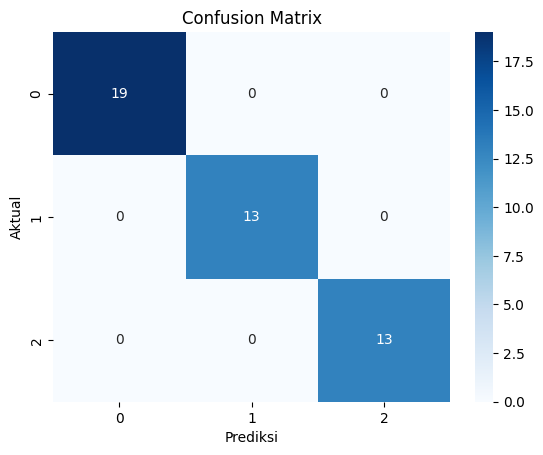


Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        19
           1       1.00      1.00      1.00        13
           2       1.00      1.00      1.00        13

    accuracy                           1.00        45
   macro avg       1.00      1.00      1.00        45
weighted avg       1.00      1.00      1.00        45



In [ ]:
# 4. Evaluasi Model dengan Data Uji
print("\n=== Evaluasi Model pada Data Uji ===")
best_rf = grid_search.best_estimator_
y_pred = best_rf.predict(X_test)

print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))

# Visualisasi Confusion Matrix
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, cmap="Blues", fmt="d")
plt.title("Confusion Matrix")
plt.xlabel("Prediksi")
plt.ylabel("Aktual")
plt.show()

print("\nClassification Report:")
print(classification_report(y_test, y_pred))

Hasil output menunjukkan evaluasi model Random Forest Classifier terbaik (hasil dari Grid Search) pada data uji menggunakan Confusion Matrix dan Classification Report. Confusion Matrix menunjukkan bahwa model berhasil memprediksi semua sampel dengan benar. Matriks menunjukkan bahwa dari 45 sampel data uji, semua prediksi untuk ketiga kelas (0, 1, dan 2) sesuai dengan label aktualnya. Tidak ada kesalahan klasifikasi, yang terlihat dari tidak adanya nilai selain nol di luar diagonal utama matriks.

Classification Report memberikan metrik evaluasi yang lebih rinci, termasuk precision, recall, dan F1-score untuk setiap kelas. Dalam output ini, semua metrik bernilai sempurna, yaitu 1.00, yang menunjukkan bahwa model memiliki akurasi sempurna dalam mengklasifikasikan data uji. Akurasi keseluruhan juga adalah 1.00, yang berarti tidak ada kesalahan dalam prediksi model pada data uji. Hasil ini menunjukkan bahwa model Random Forest dengan hyperparameter terbaik yang dipilih sangat cocok untuk dataset ini dan memiliki kemampuan generalisasi yang sangat baik pada data uji. Namun, evaluasi lebih lanjut mungkin diperlukan pada dataset yang lebih besar atau lebih kompleks untuk memastikan kinerja model tetap konsisten.